In [1]:
import sys; sys.path.insert(0, '../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


# cut selection in a selected  box dimensions for $\frac{\Delta Q_{track}}{\Delta Q_{total}}$ 

In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/RejectingCosBGInLArTPC/Figures/overlay_v8.11/'

In [3]:
N_box_sizes = 30
MinNwiresBox,dNwiresBox = 5,5
MinNticksBox,dNticksBox = 10,10
NwiresBox,NticksBox=[],[]
for i_box_size in range(N_box_sizes):
    NwiresBox.append(MinNwiresBox + i_box_size * dNwiresBox)
    NticksBox.append(MinNticksBox + i_box_size * dNticksBox) 

In [4]:
i_box_size = 9
box_dims = '[%d wires x %d ticks]'%(NwiresBox[i_box_size],NticksBox[i_box_size])
print 'optimal box dimensions:',box_dims
Ru = 'RdQaroundVertex[plane 0]'+box_dims
Rv = 'RdQaroundVertex[plane 1]'+box_dims
Ry = 'RdQaroundVertex[plane 2]'+box_dims

optimal box dimensions: [50 wires x 100 ticks]


# pairs of 2-tracks at close proximity

In [5]:
versions['overlay date'] = '2018_08_16'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
OverlaySamples = load_samples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')

285009 ccqe candidate pairs, 180070 in FV
74387 are 1mu-1p, 41.3%
55226 are other-pairs, 30.7%
155396 are cosmic, 86.3%
--------------------------------------------------------------
40729 are CC1p, 22.6%
I finished loading overlay samples. We have in total 285009 pairs


In [6]:
cuts_order  = ['no cut'
               ,'Chi2Proton'               
               ,'MatchedFlash'               
               ,'length'
               ,'non-collinearity'               
               ,'vertex activity'               
               ,'delta phi'               
               ,'Pt no delta phi'               
               ,'Pt & delta phi'
              ]
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples
                                                                   ,cuts_order=cuts_order)
pureffOverlay

,$\mu p$ eff.,$\mu p$ pur.,CC$1 p$ eff.,CC$1 p$ pur.,label,1mu-1p,other-pairs,cosmic,CC1p
no cut,100.0%,26.1%,100.0%,14.3%,no cut,100.0% (74387),100.0% (55226),100.0% (155396),100.0% (40729)
Chi2Proton,62.0%,73.0%,66.3%,42.7%,Chi2Proton,62.0% (46155),17.3% (9547),4.8% (7485),66.3% (26989)
MatchedFlash,47.5%,81.1%,51.2%,47.8%,MatchedFlash,47.5% (35339),11.2% (6184),1.3% (2050),51.2% (20836)
length,43.1%,85.4%,46.6%,50.6%,length,43.1% (32061),6.8% (3754),1.1% (1707),46.6% (18980)
non-collinearity,39.7%,89.2%,44.2%,54.4%,non-collinearity,39.7% (29505),5.0% (2760),0.5% (795),44.2% (17993)
vertex activity,29.3%,90.6%,38.6%,65.3%,vertex activity,29.3% (21829),3.3% (1815),0.3% (445),38.6% (15732)
delta phi,20.2%,96.0%,29.9%,77.7%,delta phi,20.2% (15055),0.8% (456),0.1% (179),29.9% (12184)
Pt no delta phi,22.1%,93.3%,31.4%,72.6%,Pt no delta phi,22.1% (16460),1.7% (934),0.2% (245),31.4% (12799)
Pt & delta phi,16.6%,97.1%,25.3%,80.9%,Pt & delta phi,16.6% (12378),0.5% (273),0.1% (101),25.3% (10321)


# A cut on $R_{\Delta Q}$ for the optimized box dimensions

In [7]:
RdQ_xyz, RdQ_3D_array = dict(), dict()

for i_pair_type in range(4):
    pair_type = pair_types[i_pair_type]; color=MCcolors[i_pair_type]; label=MClabels[i_pair_type]; 
    sample = reducedOverlay['non-collinearity'][pair_type]
    u,v,y = sample[Ru], sample[Rv], sample[Ry]
    RdQ_xyz[pair_type] = (u,v,y)
    RdQ_3D_array[pair_type] = np.array([[x_p,y_p,z_p] for x_p,y_p,z_p in zip(u,v,y)])
    print "created a 3D array for",pair_type

created a 3D array for 1mu-1p
created a 3D array for other-pairs
created a 3D array for cosmic
created a 3D array for CC1p


# find the optimal cut

## first draw the distribution of \RdQ\ in all three planes for all samples

pair_type: 1mu-1p
pair_type: other-pairs
pair_type: cosmic
pair_type: CC1p


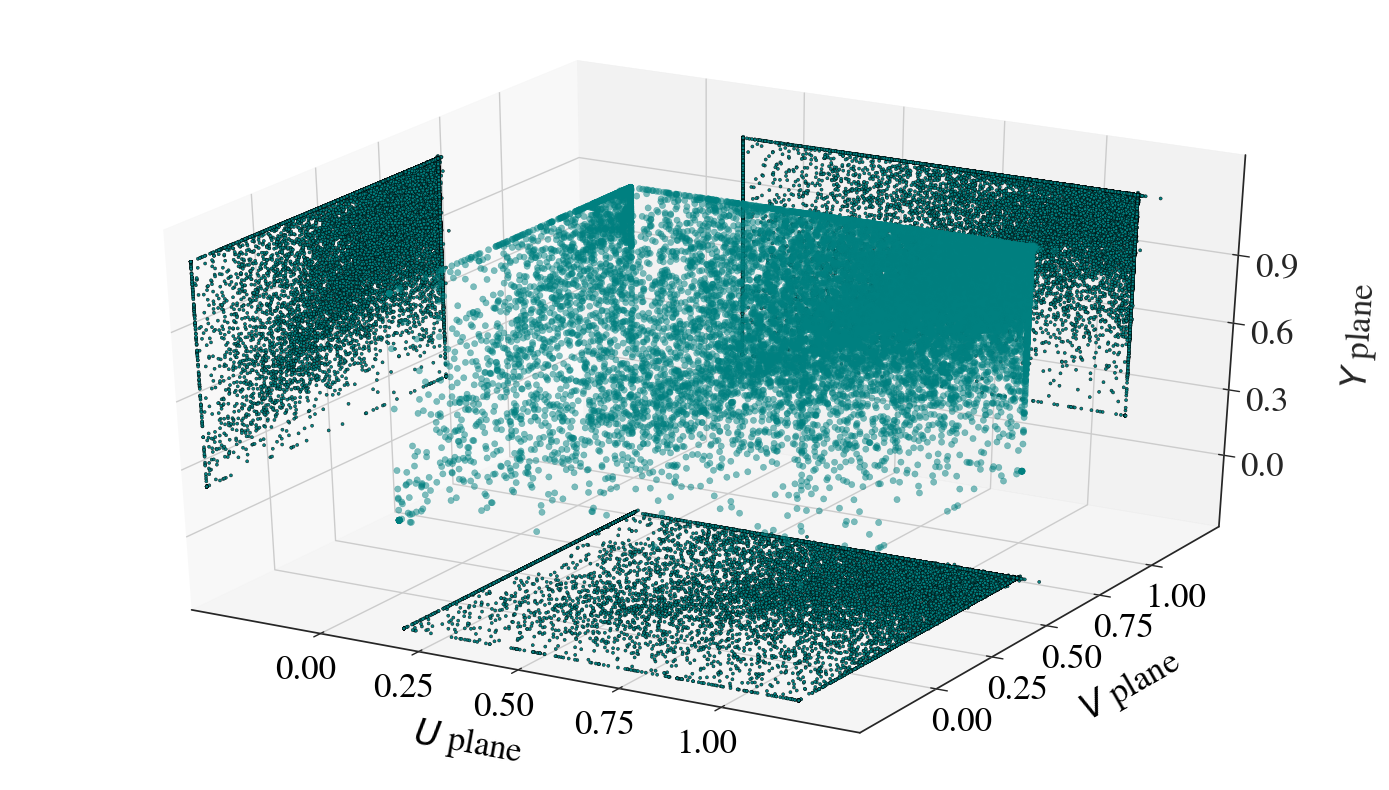

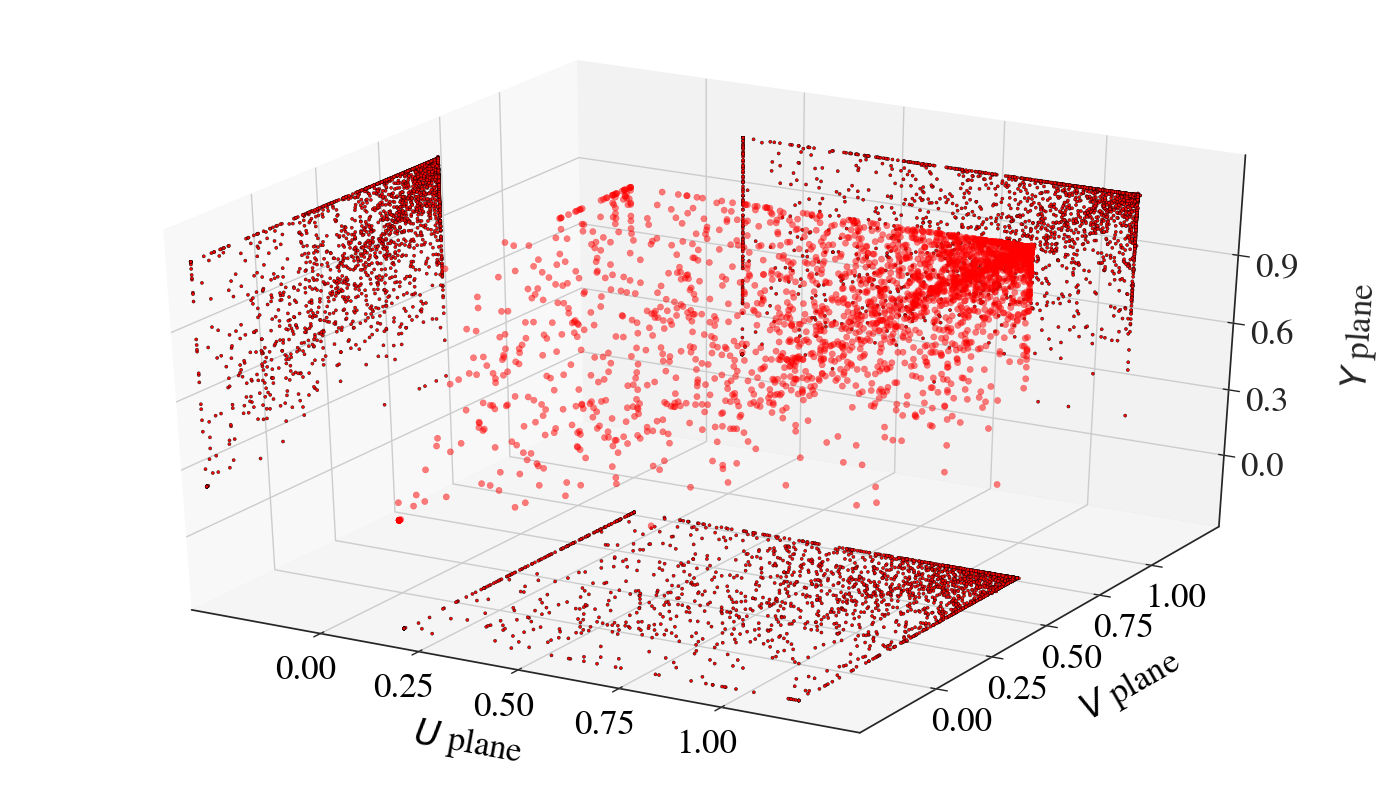

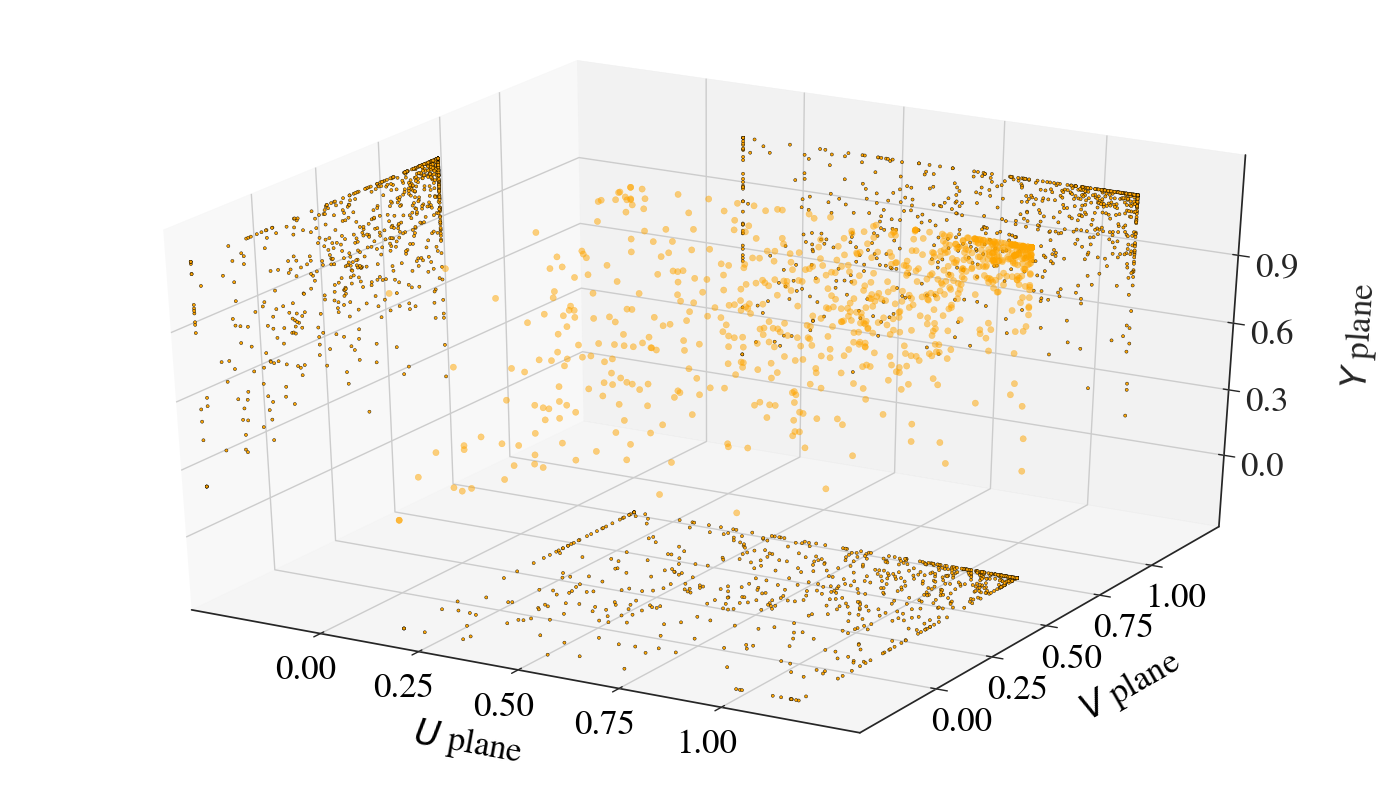

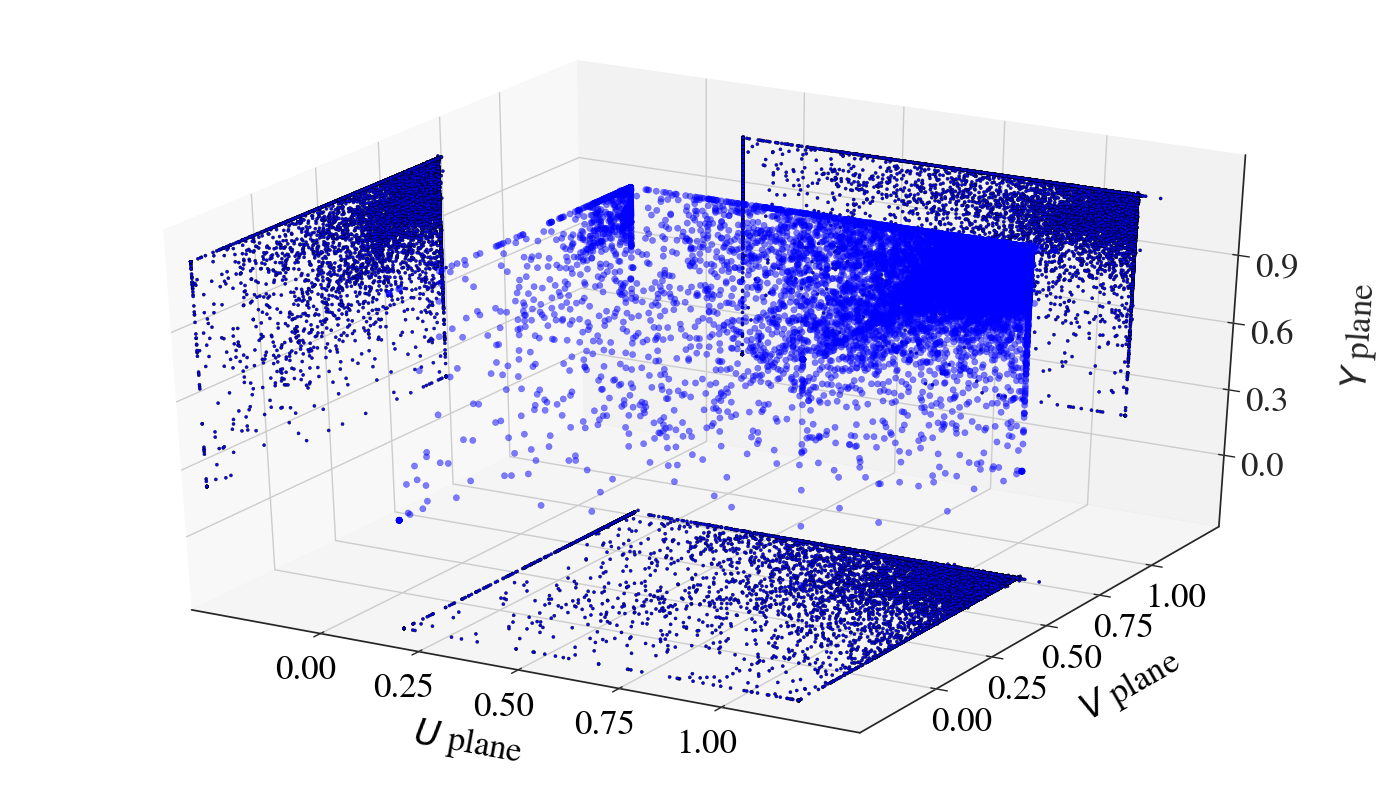

In [8]:
for i_pair_type in range(4):
    pair_type = pair_types[i_pair_type]; color=MCcolors[i_pair_type]; label=MClabels[i_pair_type]
    print 'pair_type:',pair_type
    sample = reducedOverlay['non-collinearity'][pair_type]
    u,v,y = sample[Ru], sample[Rv], sample[Ry]
    fig3D = plt.figure(figsize=(14,8)).gca(projection='3d')
    fig3D.scatter( u , v , y , c=color, s=20 , alpha=0.5 )
    fig3D.scatter(u, y, color=color, zdir='y', s=5, zs=1.5 , edgecolors='black') 
    fig3D.scatter(v, y, color=color, zdir='x', s=5, zs=-0.5 , edgecolors='black')
    fig3D.scatter(u, v, color=color, zdir='z', s=5, zs=-0.5 , edgecolors='black')
    fig3D.set_xlim(-0.3,1.3);fig3D.set_ylim(-0.3,1.3);fig3D.set_zlim(-0.3,1.3)
    set_axes(fig3D,x_label='$U$ plane',y_label='$V$ plane',z_label='$Y$ plane'
             ,xticks=[0,0.25,0.5,0.75,1],yticks=[0,0.25,0.5,0.75,1],zticks=[0,0.3,0.6,0.9])
    fig3D.xaxis.labelpad = 30 ; fig3D.yaxis.labelpad = 30 ; fig3D.zaxis.labelpad = 30
    plt.tight_layout()
    plt.savefig(figures_path + 'ChosenBoxDimensions_pairtype_%d.pdf'%i_pair_type)

## try a cut in a sphere centered around 1 - select its radius
## + add all those events with R=1 in either of the planes

In [14]:

# ------------------------------------------------
# Oct. 13, 2017
def get_pureff_MCbnbDATAcosmic_cut(cut_name = 'PIDa', cut_label=None , reduced_MCbnbDATAcosmic = dict()):
    ''' 
        return
        eff (mu-p) , pur (mu-p), eff (CC 1p 0pi) , pur (CC 1p 0pi)
    '''
    global pureff_MCbnbDATAcosmic
    eff = dict()
    pur = dict()
    Nreduced_MCbnbDATAcosmic , freduced_MCbnbDATAcosmic = get_Nreduced_MCbnbDATAcosmic(reduced_MCbnbDATAcosmic=reduced_MCbnbDATAcosmic)
    Ntot = (Nreduced_MCbnbDATAcosmic['1mu-1p']+Nreduced_MCbnbDATAcosmic['cosmic']+Nreduced_MCbnbDATAcosmic['other pairs'])
    
    eff['1mu-1p'] = freduced_MCbnbDATAcosmic['1mu-1p']
    pur['1mu-1p'] = 100.*Nreduced_MCbnbDATAcosmic['1mu-1p']/Ntot if Ntot>0 else 0
    
    eff['CC1p'] = freduced_MCbnbDATAcosmic['CC 1p']
    pur['CC1p'] = 100.*Nreduced_MCbnbDATAcosmic['CC 1p']/Ntot if Ntot>0 else 0

    pureff_MCbnbDATAcosmic_cut = pd.DataFrame({'label':cut_label
                               ,'$\mu p$ eff.':'%.1f'%eff['1mu-1p']+'%'
                               ,'$\mu p$ pur.':'%.1f'%pur['1mu-1p']+'%'
                               ,'CC$1 p$ eff.':'%.1f'%freduced_MCbnbDATAcosmic['CC1p']+'%'
                               ,'CC$1 p$ pur.':'%.1f'%(100.*Nreduced_MCbnbDATAcosmic['CC1p']/Ntot if Ntot>0 else 0)+'%'
                                              }
                               , index=[cut_name]
                              )
    for pair_type in pair_types: pureff_MCbnbDATAcosmic_cut[pair_type] = '%.1f'%freduced_MCbnbDATAcosmic[pair_type]+'%' +' (%.0f)'%Nreduced_MCbnbDATAcosmic[pair_type]
    pureff_MCbnbDATAcosmic = pureff_MCbnbDATAcosmic.append(pureff_MCbnbDATAcosmic_cut)
    reduced_MCbnbDATAcosmicSamples[cut_name] = reduced_MCbnbDATAcosmic  
    Ntot = Nreduced_MCbnbDATAcosmic['1mu-1p']+Nreduced_MCbnbDATAcosmic['cosmic']+Nreduced_MCbnbDATAcosmic['other pairs']
    return freduced_MCbnbDATAcosmic['1mu-1p'],(100.*Nreduced_MCbnbDATAcosmic['1mu-1p']/Ntot if Ntot>0 else 0),freduced_MCbnbDATAcosmic['CC1p'],(100.*Nreduced_MCbnbDATAcosmic['CC1p']/Ntot if Ntot>0 else 0)
# ------------------------------------------------


In [15]:
def pureff_in_RdQ_sphere(radius=None, i_box_size=9, debug=0):    
    '''
    return: 
            purity,efficiency of µp
    also:   purity,efficiency of CC1p
    '''
    if debug>1: print 'computing impact of cut on optimal box dimensions: (%d wires x %d ticks)'%(NwiresBox[i_optimal_box_size],NticksBox[i_optimal_box_size])
    box_dims = '[%d wires x %d ticks]'%(NwiresBox[i_box_size],NticksBox[i_box_size])
    Ru = 'RdQaroundVertex[plane 0]'+box_dims
    Rv = 'RdQaroundVertex[plane 1]'+box_dims
    Ry = 'RdQaroundVertex[plane 2]'+box_dims
    reduced = dict()
    for pair_type in pair_types:
        sam = reducedOverlay['non-collinearity'][pair_type]
        reduced[pair_type] = sam[(sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1) 
                                 | 
                                 (np.sqrt( np.square(sam[Ru]-1) + np.square(sam[Rv]-1) + np.square(sam[Ry]-1) ) <= radius) 
                                ]
    N,eff,pur = dict(),dict(),dict()
    for pair_type in pair_types:
        N[pair_type] = float(len(reduced[pair_type]))
        eff[pair_type] = N[pair_type]/len(reducedOverlay['no cut'][pair_type])
    Ntot = N['1mu-1p']+N['other-pairs']+N['cosmic']
    for pair_type in pair_types:
        pur[pair_type] = N[pair_type]/(Ntot)
    return 100*eff['1mu-1p'],pur['1mu-1p'],100*eff['CC1p'],100*pur['CC1p']

In [16]:
debug=0
radius_array = np.linspace(.1,1,100)
pureff_mup,pureff_CC1p0p = [],[]
for i_radius,radius in enumerate(radius_array):
    if (i_radius%(10)==0): print 'i_radius:',i_radius
    eff_mup,pur_mup,eff_CC1p,pur_CC1p = pureff_in_RdQ_sphere(radius=radius,
                                                             i_box_size=i_box_size, 
                                                             debug=debug)
#     print 'eff_CC1p,pur_CC1p:',eff_CC1p,pur_CC1p
    pureff_mup.append(eff_mup*pur_mup)
    pureff_CC1p0p.append(eff_CC1p*pur_CC1p)
print 'done'

i_radius: 0
i_radius: 10
i_radius: 20
i_radius: 30
i_radius: 40
i_radius: 50
i_radius: 60
i_radius: 70
i_radius: 80
i_radius: 90
done


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:8: RankWarning: Polyfit may be poorly conditioned


r_max: 0.435135135135
$r_max \simeq 0.430000$
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/RejectingCosBGInLArTPC/Figures/overlay_v8.11/cut_optimization_rRdQ.pdf


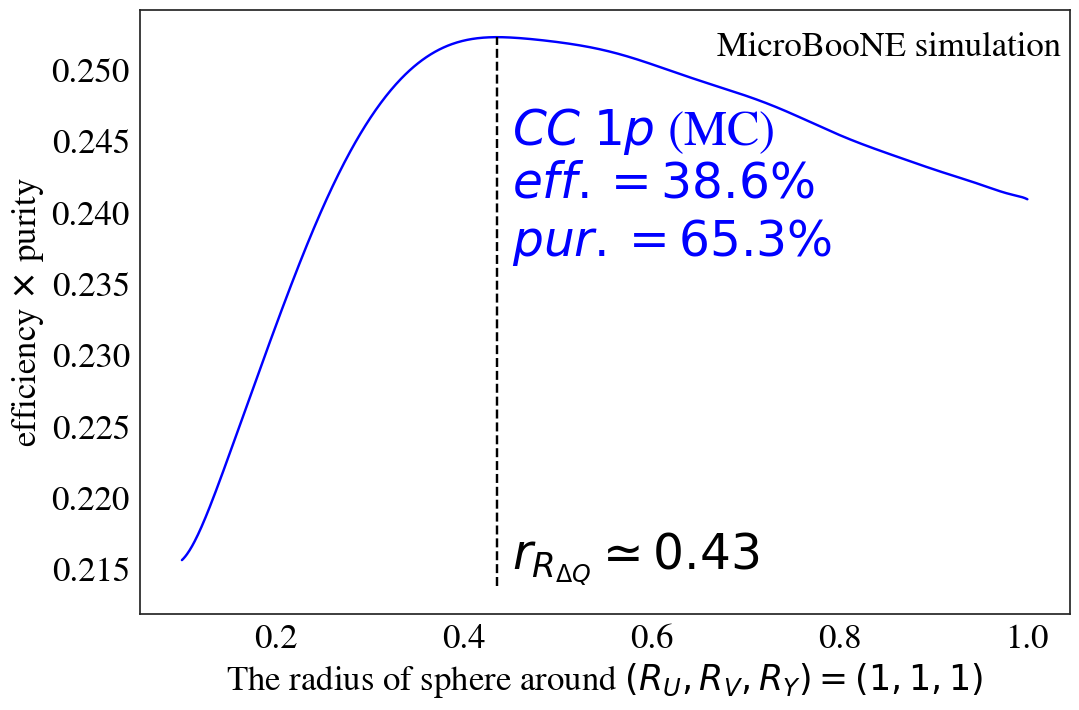

In [22]:
fig,ax=plt.subplots(figsize=(12,8))
i_pair_type = 3
pureff = pureff_CC1p0p
x = radius_array
y = np.array(pureff)*1e-4
# plt.plot(x, y , 'o',color=MCcolors[i_pair_type],label=MClabels[i_pair_type])

popt = np.polyfit( x, y , 20)
poly = np.poly1d(popt)
x_poly = np.linspace(.1,1,1000)
y_poly = poly(x_poly)
plt.plot(x_poly, y_poly ,color=MCcolors[i_pair_type],label=MClabels[i_pair_type])

set_axes(ax,'The radius of sphere around $(R_U,R_V,R_Y)=(1,1,1)$',r'efficiency $\times$ purity'
         ,do_add_legend=False
#          ,ylim=(0.248,0.29),yticks=[0.25,0.26,0.27,0.28,0.29]
        )
# best point
i_max = np.argmax(y_poly)
# i_max = 20
r_max = x_poly[i_max]
print 'r_max:',r_max
r_max_rounded = float(np.floor( np.int(100.*r_max) ))/100
print r'$r_max \simeq %f$'%r_max_rounded
plt.plot([r_max,r_max],[np.min(ax.get_ylim()),poly(r_max)],'--',color='black')
eff_mup,pur_mup,eff_CC1p,pur_CC1p = pureff_in_RdQ_sphere(radius=r_max_rounded, i_box_size=9, debug=0)

plt.text(1.05*r_max_rounded,0.215,r'$r_{R_{\Delta Q}}\simeq %.2f$'%r_max_rounded,fontsize=35 ,color='black') 
plt.text(1.05*r_max_rounded,0.237,'$CC\;1p$ (MC)\n$eff.=%.1f'%eff_CC1p+'\%$'+'\n$pur.=%.1f'%pur_CC1p+'\%$',fontsize=35 ,color=MCcolors[3])
plt.text(0.67,0.251,'MicroBooNE simulation',fontsize=25 ,color='black') 
plt.savefig(figures_path+'cut_optimization_rRdQ.pdf')
print 'saved',figures_path+'cut_optimization_rRdQ.pdf'